# Aplicação de Python na Agrometeorologia

Este Jupyter Notebook é parte integrande do curso de Python ministrado durante XXII Congresso Brasiliero de Agrometeorologia realizado nos dias 3, 4 e 5 de outubro de 2023 na cidade Natal/RN.

# Importação de bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

warnings.filterwarnings('ignore')

from datetime import datetime

# Abertura do arquivo csv

Tratamento da coluna 'Dia' do DataFrame como DateTime e depois converte em index.

In [10]:
# Documentação:
# https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

df = pd.read_csv(
    '../output/chuva_diaria_cpc_19910901_20221231.csv',
    index_col='Dia', 
    parse_dates=True  
)

In [3]:
#Outra possibilidade de tratar a coluna 'Dia' como DateTime e depois converter em index:
# df['Dia'] = pd.to_datetime(df['Dia'])
# df.set_index('Dia', inplace=True)

Inspeção do DataFrame.

In [4]:
df

,Chuva
Dia,
1991-01-01,1.083005
1991-01-02,1.132334
1991-01-03,1.101605
1991-01-04,1.662441
1991-01-05,1.765939
...,...
2022-12-27,0.583862
2022-12-28,0.579153
2022-12-29,1.396807


Plot básico do DataFrame.

<AxesSubplot:xlabel='Dia'>

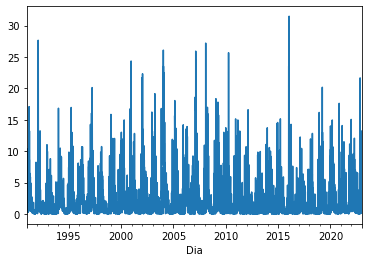

In [5]:
df['Chuva'].plot() # Outra possibilidade: df.Chuva.plot()

# Algumas transformações no DataFrame

## Acumulado semanal de precipitação

In [6]:
# Documentação:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html

# A semana começa no domingo.
# 1991-01-06 = domingo -> soma todos os dias 1, 2, 3, 4, 5 e 6 até domingo.
# 1991-01-13 = domingo -> soma todos os 7, 8, 9, 10, 11, 12 e 13.

acumulado_semanal = df.resample('W').sum()

acumulado_semanal

,Chuva
Dia,
1991-01-06,9.129289
1991-01-13,21.347733
1991-01-20,34.693554
1991-01-27,30.552475
1991-02-03,12.096516
...,...
2022-12-04,41.211758
2022-12-11,11.958293
2022-12-18,17.074450


<AxesSubplot:xlabel='Dia'>

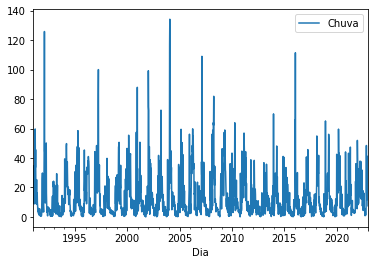

In [9]:
acumulado_semanal.plot()